In [1]:
import sys

sys.path.append("..")

%load_ext autoreload
%autoreload complete

In [2]:
from math import log

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

from lmrecon.plotting import save_plot, format_plot
from lmrecon.stats import area_weighted_mean
from lmrecon.util import get_base_path
from lmrecon.plotting_config import set_plotting_theme
set_plotting_theme()

# eVolv2k v4

In [3]:
# asy: 1=Greenland, 0=Antarctica
df = pd.read_csv(get_base_path() / "datasets/volcanic/Sigl-Toohey_2024_eVolv2k_v4.tab", sep="\t", skiprows=48)
df.columns = ["year", "yearCE", "month", "day", "lat", "so4Greenland", "so4Antarctic", "vssi", "sigma_vssi", "asy", "loc", "tephra", "ref"]
df = df.drop(["yearCE", "so4Greenland", "so4Antarctic", "tephra", "ref"], axis=1)
df = df[(df["year"] >= 850) & (df["year"] <= 1850) ]
df

,year,month,day,lat,vssi,sigma_vssi,asy,loc
8,1846,1,1,45.0,0.97,0.41,1.000,NaN
9,1835,1,20,13.0,9.48,2.21,0.663,Cosigüina (Nicaragua)
10,1831,7,1,46.9,12.00,7.00,0.890,Zavaritskii-Simushir Island (Kurils)
11,1822,10,8,-7.3,2.02,0.79,1.000,Galunggung (Indonesia)
12,1821,1,1,-45.0,0.55,0.28,0.000,NaN
13,1815,4,10,-8.0,28.08,4.49,0.456,Tambora (Indonesia)
14,1809,1,1,0.0,19.26,3.54,0.560,NaN
15,1797,1,1,45.0,0.74,0.33,1.000,NaN
16,1796,1,1,45.0,0.69,0.32,1.000,NaN
17,1786,1,1,45.0,0.83,0.36,1.000,NaN


In [5]:
df_large = df[df["vssi"] >= 7.5]
df_large

,year,month,day,lat,vssi,sigma_vssi,asy,loc
9,1835,1,20,13.0,9.48,2.21,0.663,Cosigüina (Nicaragua)
10,1831,7,1,46.9,12.00,7.00,0.890,Zavaritskii-Simushir Island (Kurils)
13,1815,4,10,-8.0,28.08,4.49,0.456,Tambora (Indonesia)
14,1809,1,1,0.0,19.26,3.54,0.560,NaN
18,1783,6,15,64.4,20.81,7.04,1.000,Laki (Iceland)
28,1695,1,1,0.0,15.74,2.88,0.523,NaN
35,1640,12,26,6.1,18.68,4.28,0.734,Mount Parker (Philippines)
38,1600,2,17,-16.6,18.95,4.03,0.671,Huaynaputina (Peru)
39,1595,3,1,4.9,8.87,1.51,0.444,Nevado del Ruiz (Columbia)
41,1585,1,10,19.5,8.51,2.34,0.914,Colima (Mexico)


(850.0, 2000.0)

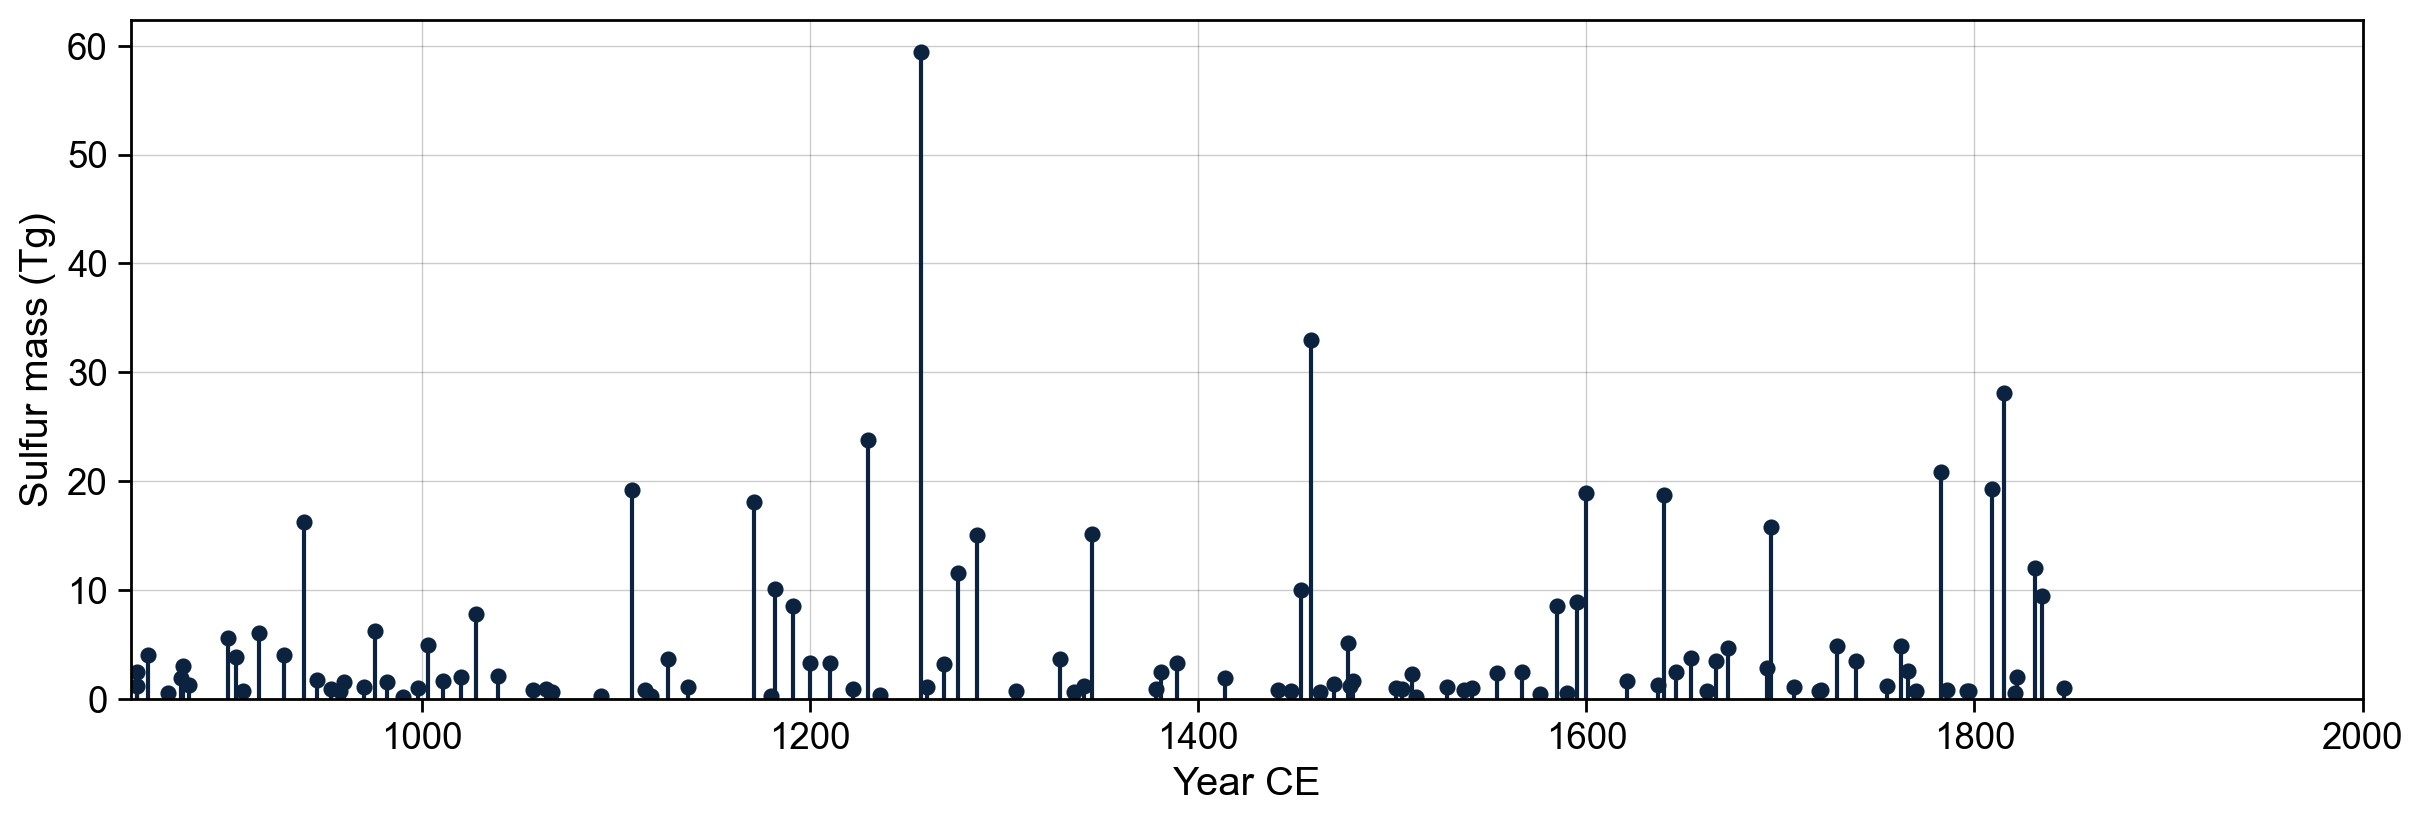

In [11]:
_, ax = plt.subplots(figsize=(12, 4))
ax.stem(df["year"], df["vssi"], basefmt=" ")
ax.set_ylim([0, ax.get_ylim()[1]])
# ax.set_xlim([850, 1850])
# ax.set_xlim([1050, 1120])
ax.set_ylabel("Sulfur mass (Tg)")
ax.tick_params(direction="out")

ax.set_xlabel("Year CE")
format_plot(major_grid=True)
ax.set_xlim(850, 2000)

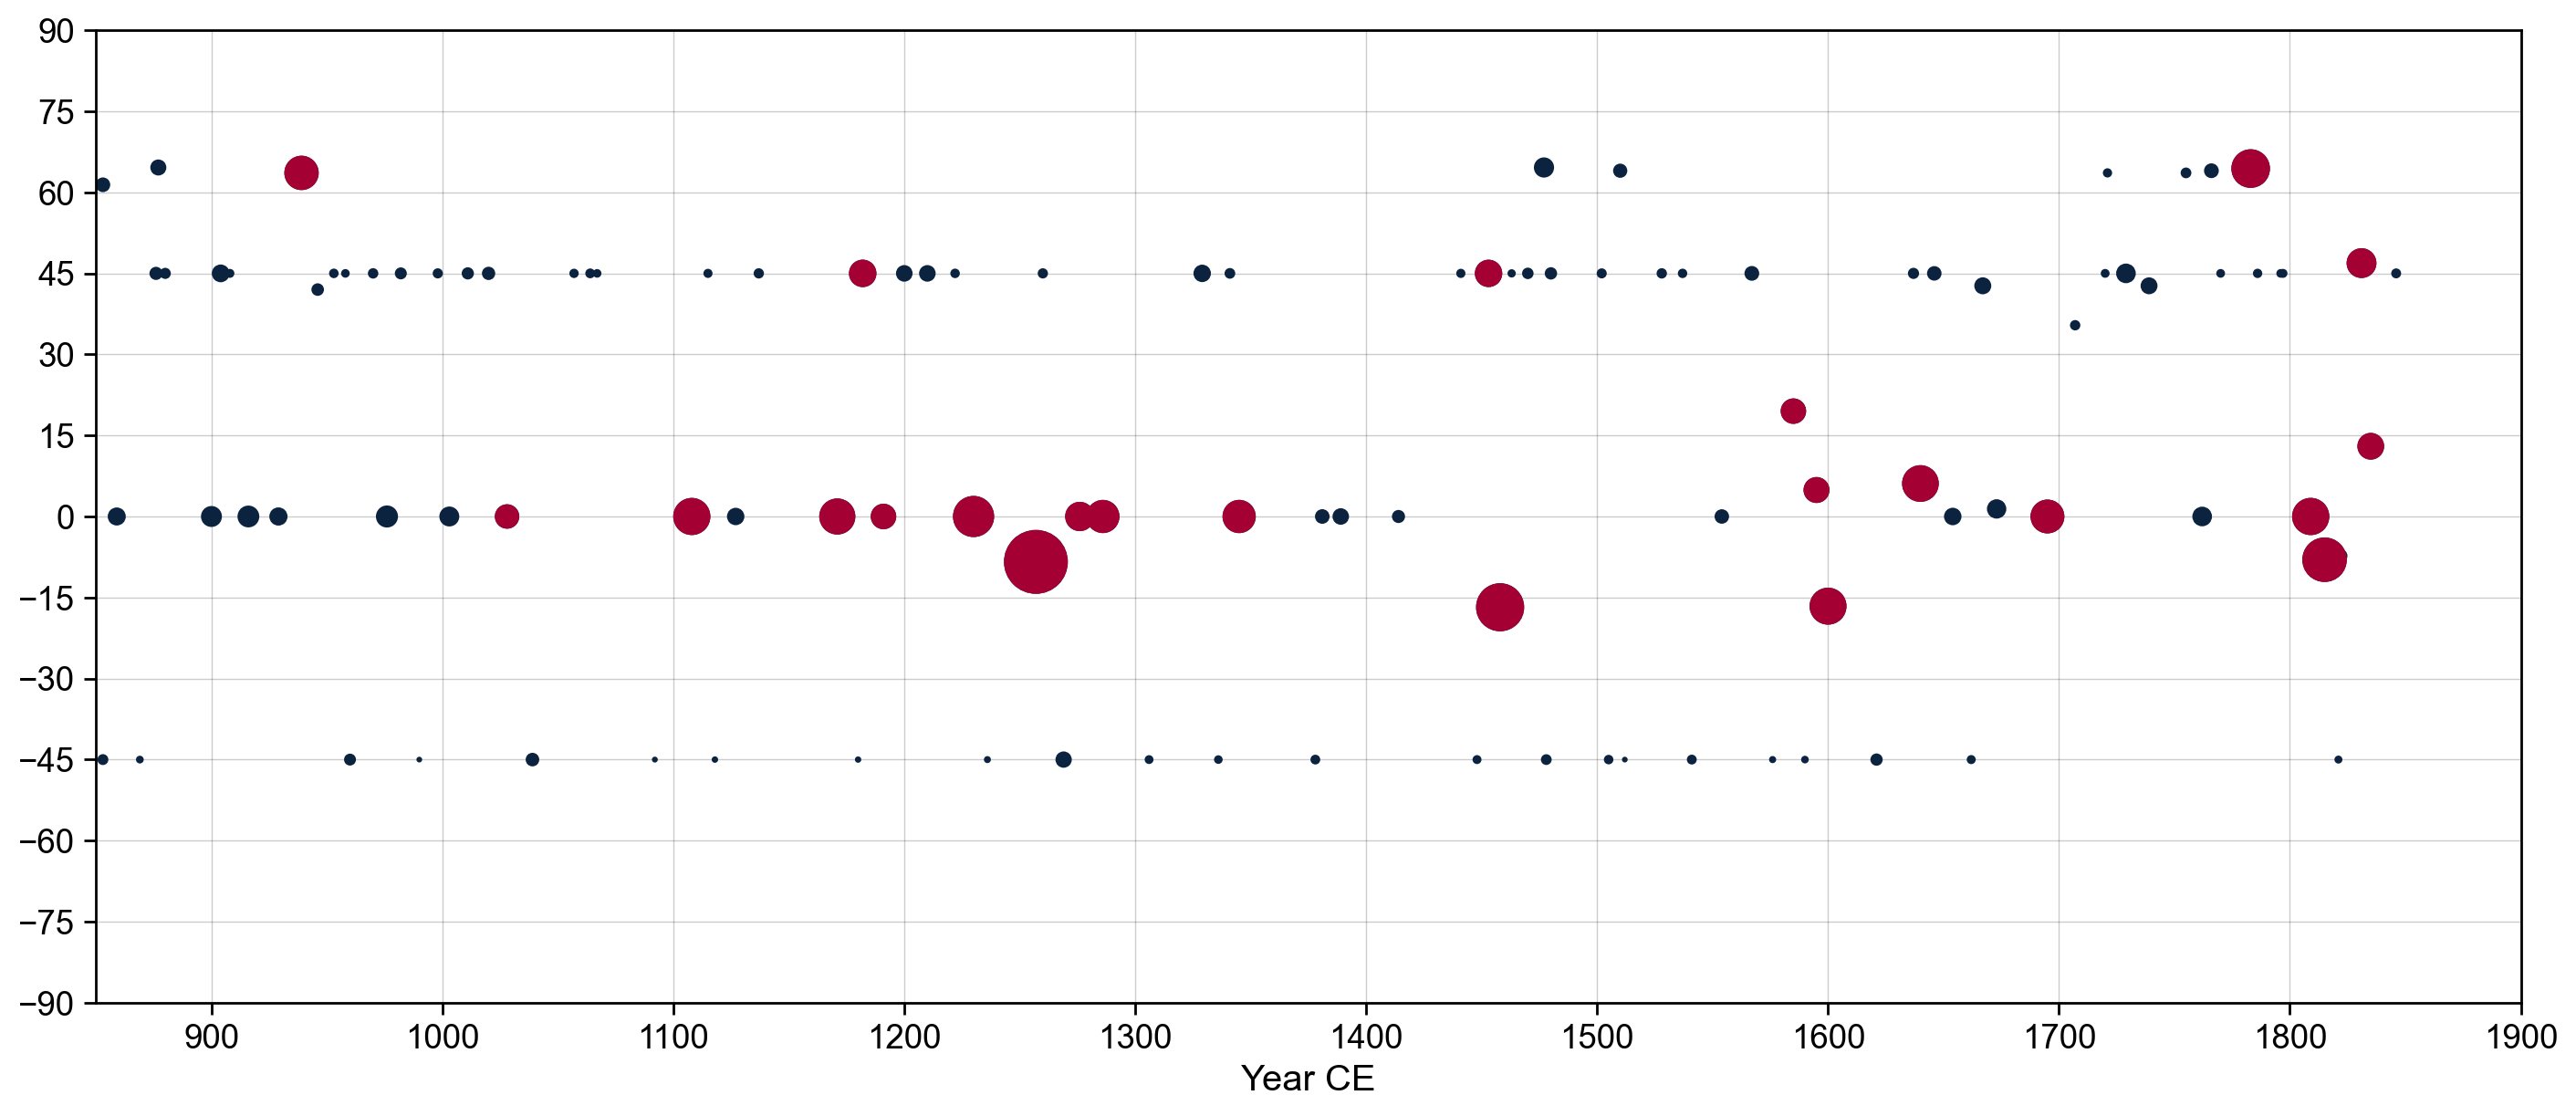

In [14]:
fig, ax = plt.subplots()
ax.scatter(df["year"], df["lat"], s=df["vssi"]*10)
ax.scatter(df_large["year"], df_large["lat"], s=df_large["vssi"]*10, c="C1")
ax.set_ylim(-90, 90)

ax.set_xlabel("Year CE")
format_plot(major_grid=True)
ax.set_xlim(850, 1900)
ax.set_xticks(np.arange(900, 1901, 100))
ax.set_yticks(np.arange(-90, 91, 15))
pass

# eVolv2k v3

In [ ]:
ds = xr.open_dataset(get_base_path() / "datasets/volcanic/eVolv2k_v3/eVolv2k_v3_ds_1.nc")
ds

<xarray.Dataset> Size: 16kB
Dimensions:     (nerup: 256)
Dimensions without coordinates: nerup
Data variables:
    year        (nerup) float64 2kB ...
    yearCE      (nerup) float64 2kB ...
    month       (nerup) float64 2kB ...
    day         (nerup) float64 2kB ...
    lat         (nerup) float64 2kB ...
    vssi        (nerup) float64 2kB ...
    hemi        (nerup) float64 2kB ...
    sigma_vssi  (nerup) float64 2kB ...
Attributes:
    title:      Ice core-inferred volcanic stratospheric sulfur injection (VS...
    history:    Created Thu Jul 11 16:51:32 2019
    reference:  Toohey and Sigl (2017) doi:10.5194/essd-9-809-2017
    comment:    Minor update from v2, includes reassignment of eruption regio...

In [5]:
# df = pd.read_csv("/home/enkf6/dstiller/datasets/volcanic_SO2_eVolv2k_CESM_UKESM_v3_noLaki.csv")
df = ds.to_pandas()
df = df[(df["year"] >= 850) & (df["year"] <= 1850) ]
df

,year,yearCE,month,day,lat,vssi,hemi,sigma_vssi
nerup,,,,,,,,
8,1846.0,1846.0,1.0,1.0,45.0,0.97,-1.0,0.41
9,1835.0,1835.0,1.0,20.0,13.0,9.48,2.0,2.21
10,1831.0,1831.0,1.0,1.0,19.5,12.98,8.1,3.41
11,1822.0,1822.0,10.0,8.0,-7.3,2.02,10.0,0.79
12,1821.0,1821.0,1.0,1.0,-45.0,0.55,-1.0,0.28
13,1815.0,1815.0,4.0,10.0,-8.0,28.08,0.8,4.49
14,1809.0,1809.0,1.0,1.0,0.0,19.26,1.3,3.54
15,1797.0,1797.0,1.0,1.0,45.0,0.74,-1.0,0.33
16,1796.0,1796.0,1.0,1.0,45.0,0.69,-1.0,0.32


In [6]:
ds_eva = xr.open_dataset(get_base_path() / "datasets/volcanic/eVolv2k_v3/eVolv2k_v3_EVA_AOD_-500_1900_1.nc")["aod550"]
ds_eva = ds_eva.sel(time=slice(850, 1850))
ds_eva

<xarray.DataArray 'aod550' (time: 12001, lat: 96)> Size: 5MB
[1152096 values with dtype=float32]
Coordinates:
  * time     (time) float32 48kB 850.0 850.1 850.2 ... 1.85e+03 1.85e+03
  * lat      (lat) float32 384B 88.57 86.72 84.86 83.0 ... -84.86 -86.72 -88.57
Attributes:
    long_name:  aerosol optical depth
    units:      unitless

(1000.0, 1200.0)

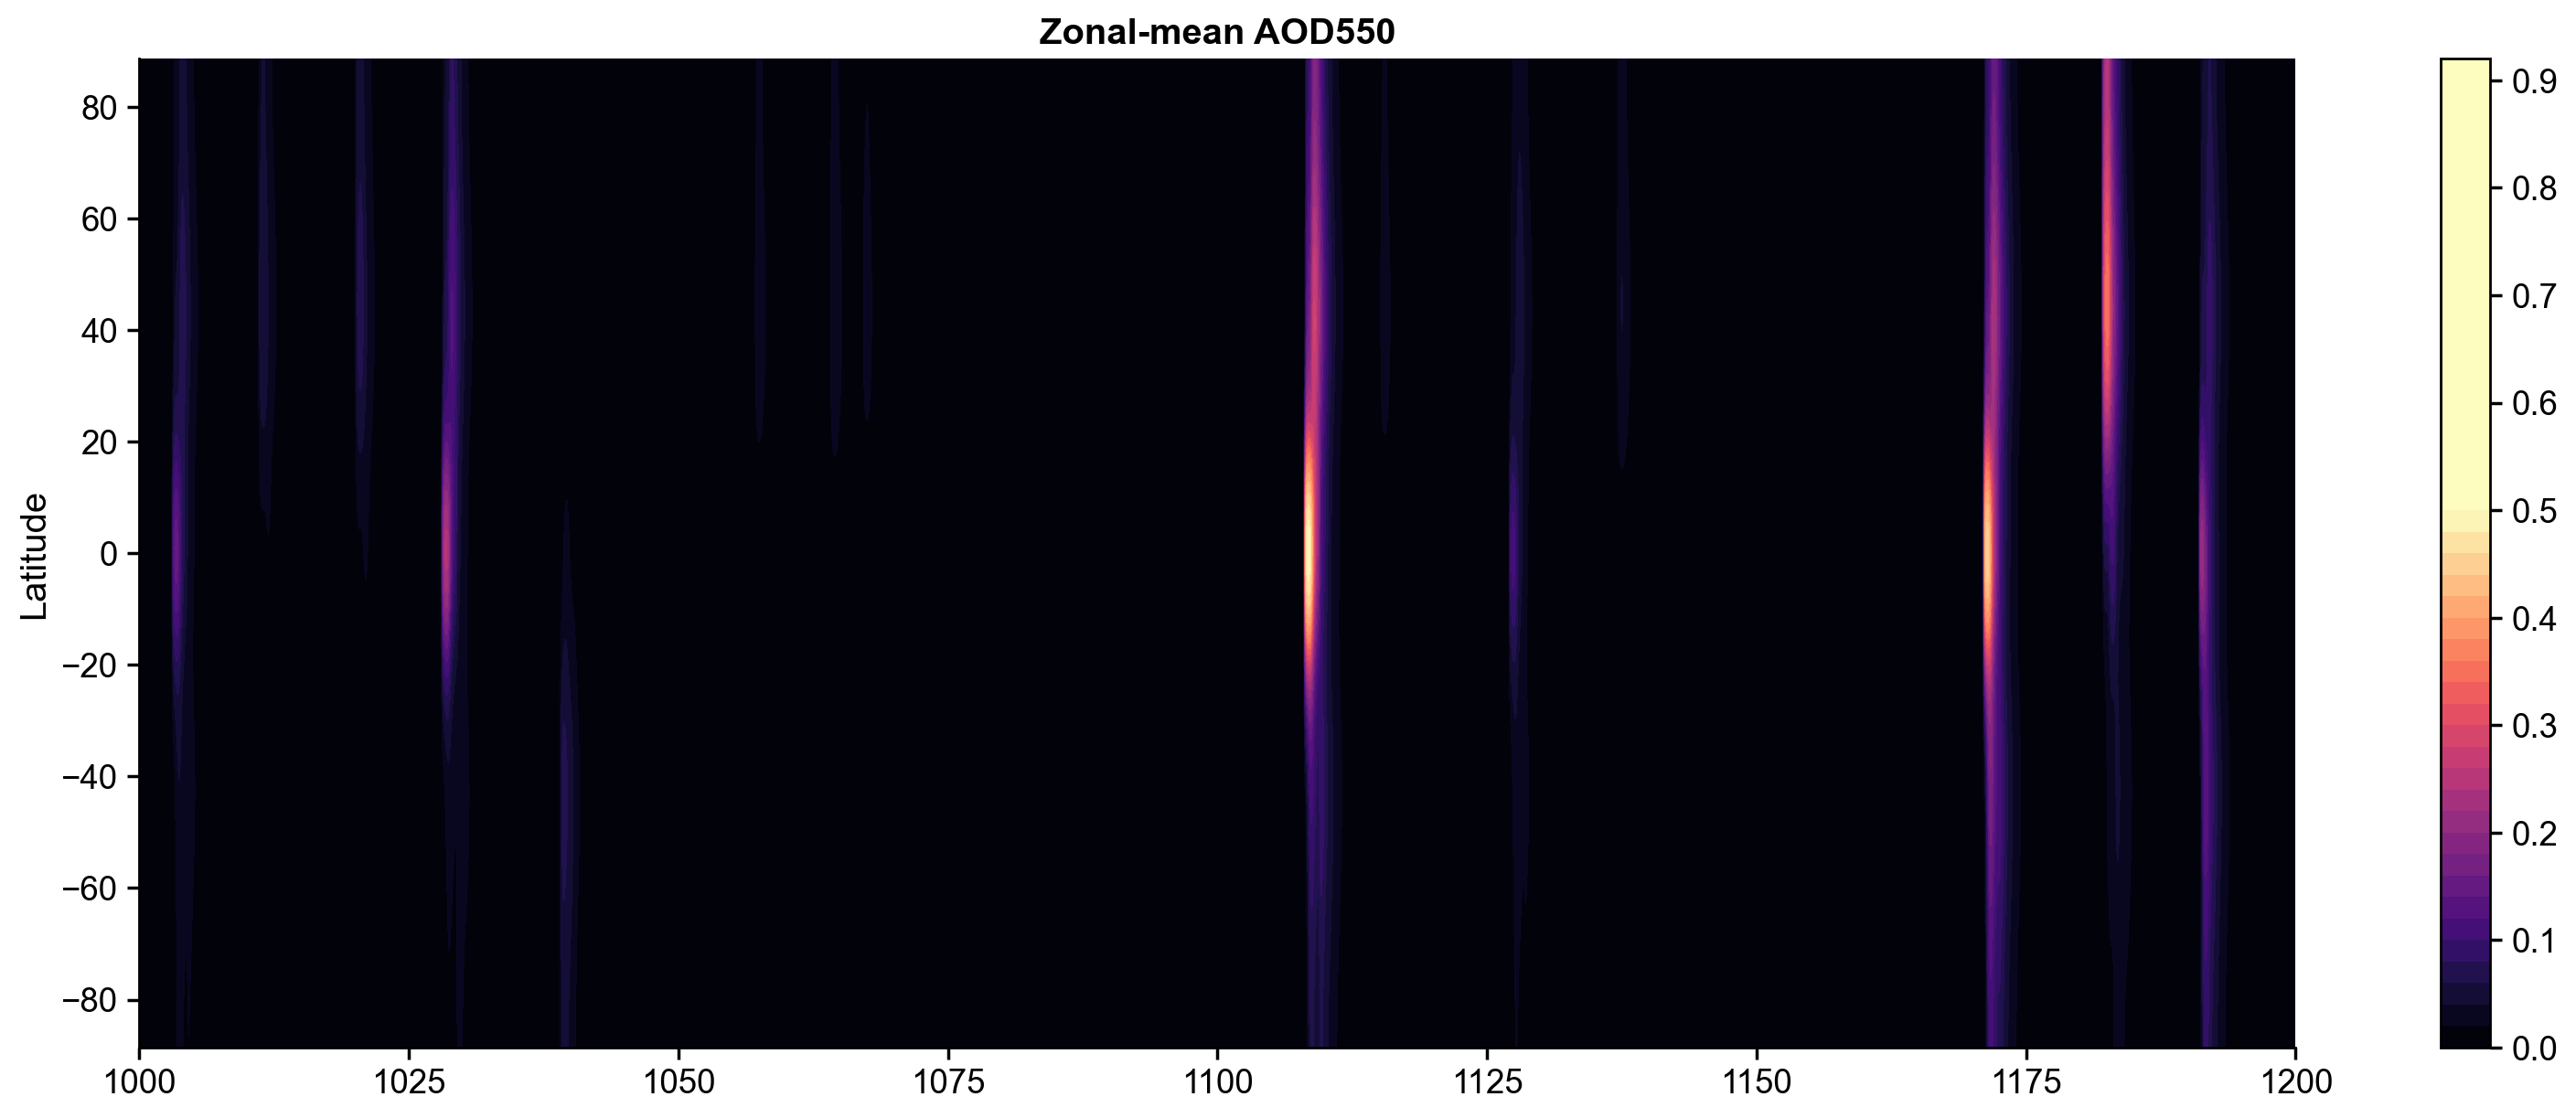

In [7]:
fig, ax = plt.subplots()
cs = ax.contourf(ds_eva.time, ds_eva.lat, ds_eva.transpose("lat", "time"), cmap="magma", levels=50, vmax=0.5)
plt.colorbar(cs, ax=ax)
ax.set_title(f"Zonal-mean AOD550")
ax.set_ylabel("Latitude")
ax.set_xlim(1000, 1200)

In [7]:
da_erf = area_weighted_mean(-20.7 * (1 - np.exp(-ds_eva)))
da_erf = da_erf.groupby(da_erf["time"].astype(int)).mean()
da_erf

<xarray.DataArray 'aod550' (time: 1001)> Size: 4kB
array([-0.06018097, -0.06016415, -0.06015854, ..., -0.11194244,
       -0.07772219, -0.06943329], dtype=float32)
Coordinates:
  * time     (time) int64 8kB 850 851 852 853 854 ... 1846 1847 1848 1849 1850

(850.0, 870.0)

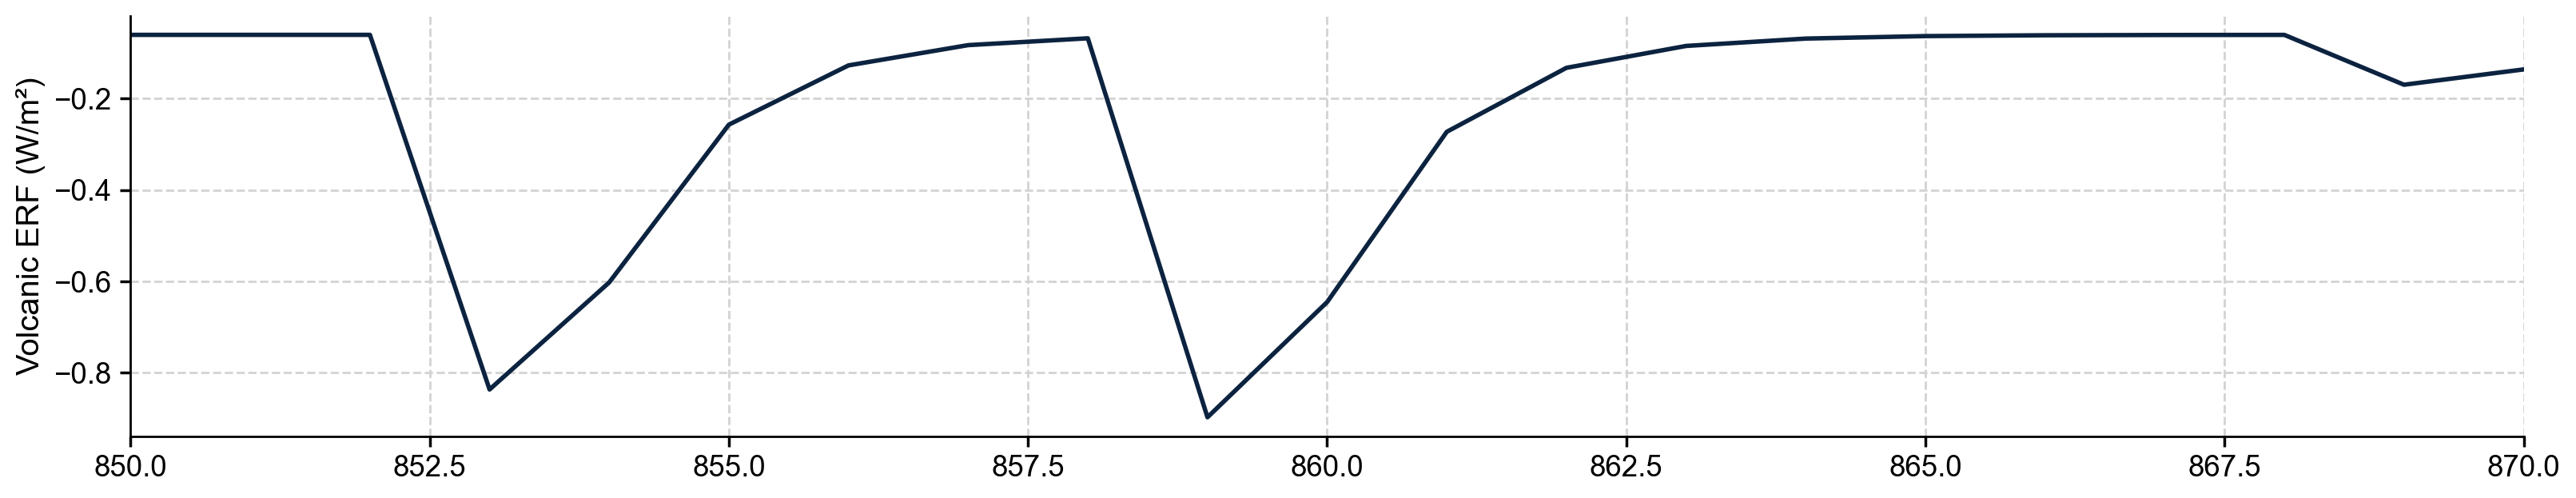

In [8]:
fig, ax = plt.subplots(figsize=(16, 3))
x = da_erf.sel(time=slice(850, 870))
ax.plot(x.time, x)
ax.set_ylabel("Volcanic ERF (W/m²)")
ax.set_xlim([850, 870])

In [9]:
def merged_intervals(intervals: list[(int, int)]) -> list[(int, int)]:
    # From https://stackoverflow.com/a/71557036
    if not intervals:
        return []
    sorted_intervals = sorted(intervals, key=lambda i: i[0])
    merged = [sorted_intervals[0]]
    for start, end in sorted_intervals[1:]:
        if merged[-1][1] >= start:
            merged[-1][1] = max(merged[-1][1], end)
        else:
            merged.append([start, end])
    return merged

def calculate_interval_length(intervals):
    return sum(end - start for (start, end) in intervals)

23 tropical eruptions larger than 5 Tg
295.0 simulation years out of 1000 years


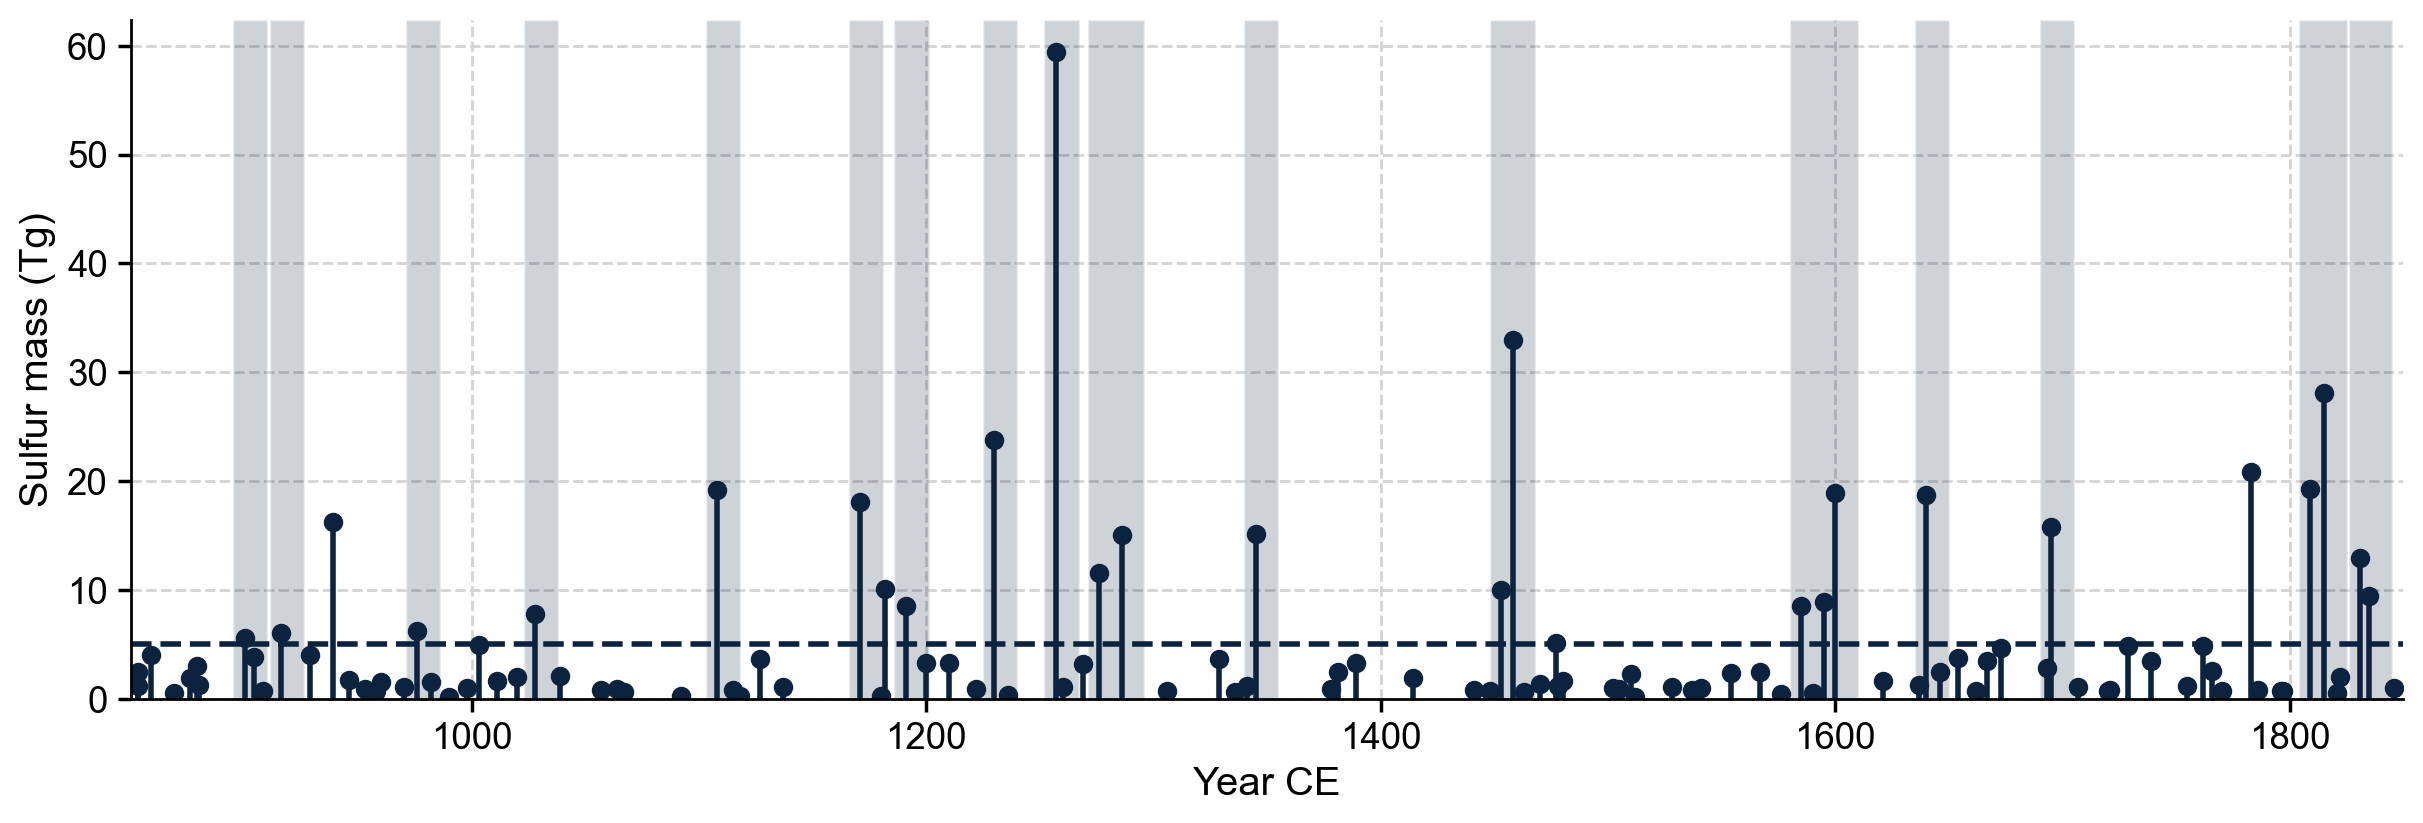

In [10]:
def find_volcanic_periods_by_ssi(ssi_threshold, years_before=5, years_after=10):
    df_large_tropical_eruptions = df[(df["vssi"] > ssi_threshold) & (np.abs(df["lat"] <= 20))]
    print(len(df_large_tropical_eruptions), "tropical eruptions larger than", ssi_threshold, "Tg")
    eruption_years = df_large_tropical_eruptions["year"]
    intervals = [[y - years_before, y + years_after] for y in eruption_years]
    return merged_intervals(intervals)

ssi_threshold = 5
volcanic_periods = find_volcanic_periods_by_ssi(ssi_threshold)
print(calculate_interval_length(volcanic_periods), "simulation years out of 1000 years")

_, ax = plt.subplots(figsize=(12, 4))
ax.stem(df["year"], df["vssi"], basefmt=" ")
ax.set_ylim([0, ax.get_ylim()[1]])
ax.set_xlim([850, 1850])
ax.set_ylabel("Sulfur mass (Tg)")
ax.axhline(ssi_threshold, ls="--")
for start, end in volcanic_periods:
    ax.axvspan(start, end, alpha=0.2)
ax.tick_params(direction="out")

ax.set_xlabel("Year CE")

save_plot("../plots", "volcanic_periods_by_ssi")

65 years larger than 1 W/m²
258 simulation years out of 1000 years


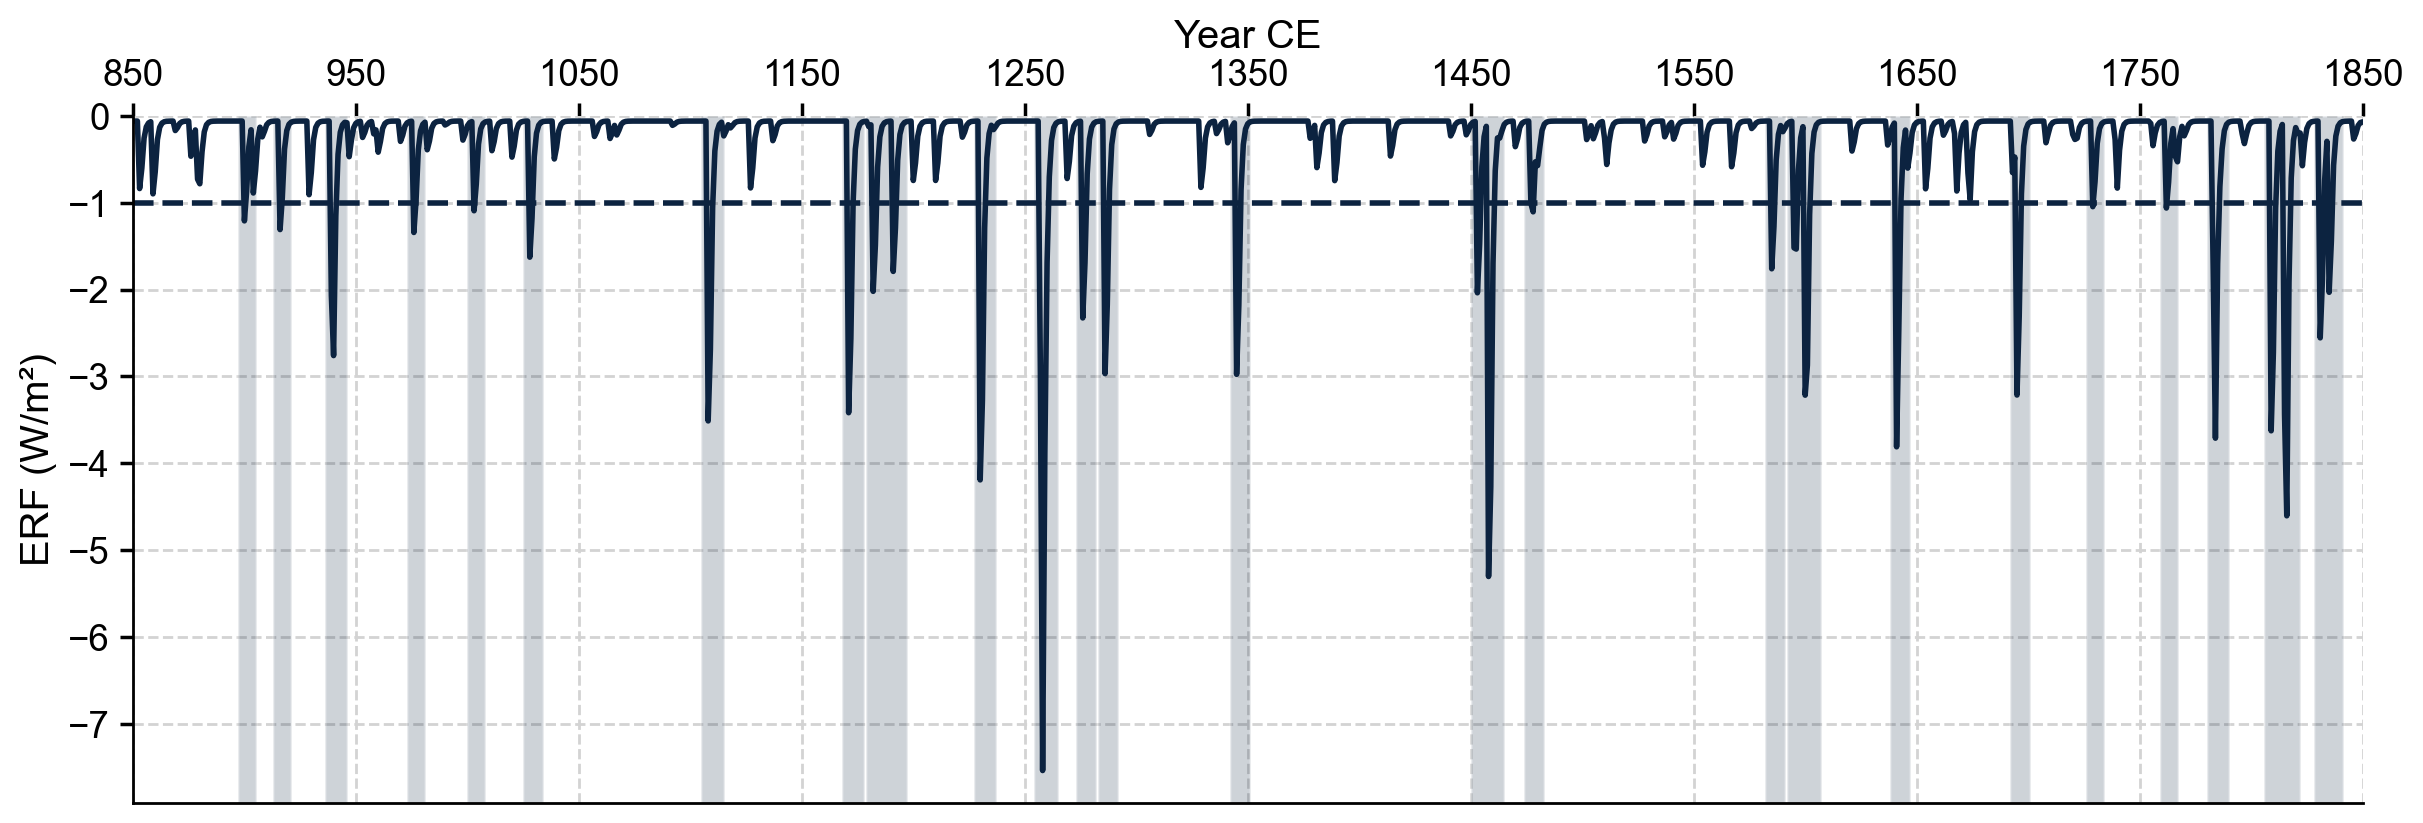

In [11]:
def find_volcanic_periods_by_erf(erf_threshold, years_before=3, years_after=5):
    da_large_eruptions = da_erf[da_erf <= -erf_threshold]
    print(len(da_large_eruptions), "years larger than", erf_threshold, "W/m²")
    eruption_years = np.array(da_large_eruptions["time"])
    intervals = [[y - years_before, y + years_after] for y in eruption_years]
    return merged_intervals(intervals)

erf_threshold = 1
volcanic_periods = find_volcanic_periods_by_erf(erf_threshold)
print(calculate_interval_length(volcanic_periods), "simulation years out of 1000 years")

_, ax = plt.subplots(figsize=(12, 4))
ax.plot(da_erf["time"], da_erf)
ax.set_ylim([ax.get_ylim()[0], 0])
ax.set_xlim([850, 1850])
ax.set_ylabel("ERF (W/m²)")
ax.axhline(-erf_threshold, ls="--")
for start, end in volcanic_periods:
    ax.axvspan(start, end, alpha=0.2)

ax.tick_params(direction="out")
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

ax.set_xlabel("Year CE")

save_plot("../plots", "volcanic_periods_by_erf")
format_plot()
ax.set_xticks(range(850, 1851, 100))
pass

# Miscellaneous

Time until mass has decayed to 1% of eruption mass ($\tau_{loss} = $ 11 months):

In [12]:
11 * log(1 / 0.01)

50.65687204586901

which is 5 years.